# **MINI CHALLENGE**

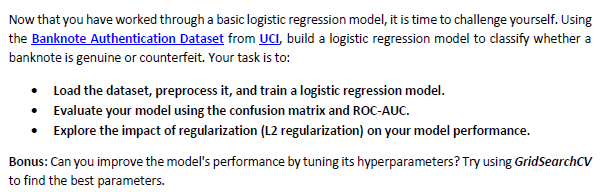

# Step 1: Importing the necessary libraries

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from scipy import stats
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

# Step 2: Loading data

In [ ]:
# Load the  dataset
url='https://archive.ics.uci.edu/static/public/267/data.csv'
df = pd.read_csv(url)
# Display the first few rows of the dataset
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Step 3: Understanding the data

In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Step 4: Data Preparation & Cleaning Checklist
1.   Missing Values
2.   Duplicate and Low Variation Data
3.   Incorrect and Irrelevant Data
4.   Categorical Data
5.   Outliers
6.   Feature Scaling
7.   Feature Engineering/Selection
8.   Validation Split


## **1. Missing Values**

In [ ]:
df.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


**There is no missing values in the data**

## **2. Duplicate and Low Variation Data**

### Data duplication checking and resolution

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1367,False
1368,False
1369,False
1370,False


In [ ]:
df.duplicated().sum()

24

In [ ]:
df.shape

(1372, 5)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1348, 5)

**The 24 duplicaated rows in the data are removed for getting a better result.**

### Checking for the low variance data

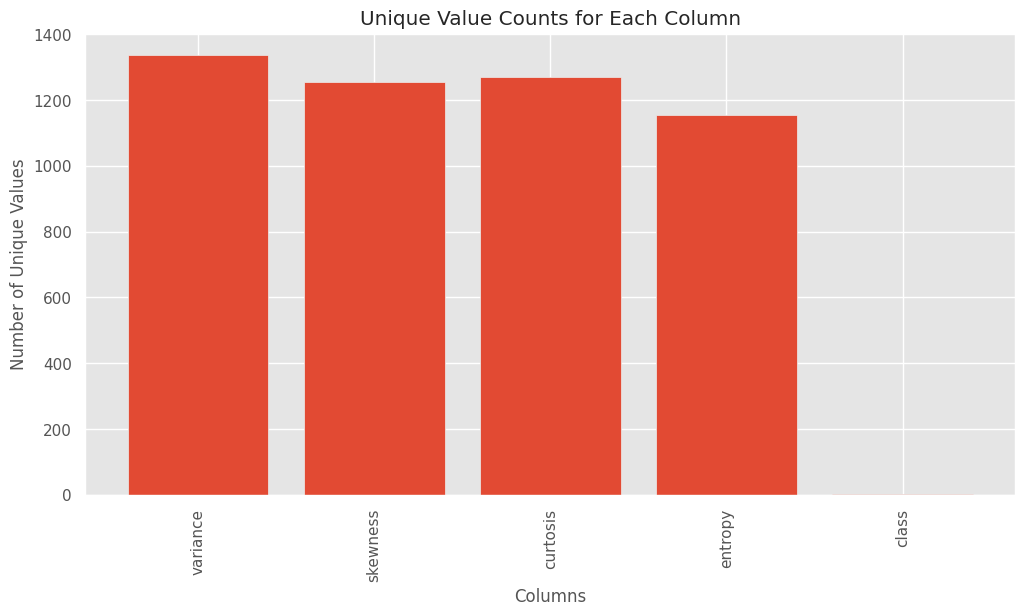

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()


* **The above graph shows the unique values for each of the four feaatures**

* **As the class column has only two unique values that are 0 and 1, so its bar is not obvious in the bar chart shown above**

* **As all the features have high variations so we cannot drop features here**

## **3. Incorrect and Irrelevant Data**


**Irrelevant data** is anything that isn’t related specifically
to the problem you’re looking to solve. For example, if
you're predicting house prices, but your dataset contains
commercial properties as well - these would need to be
removed.

**Incorrect data** can be hard to spot! An example could
be looking for values that shouldn’t be possible such a
negative house price values.


*   **As there is no irrelevant and incorrect data in the dataset so no processing is required in this step.**



## **4. Categorical Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


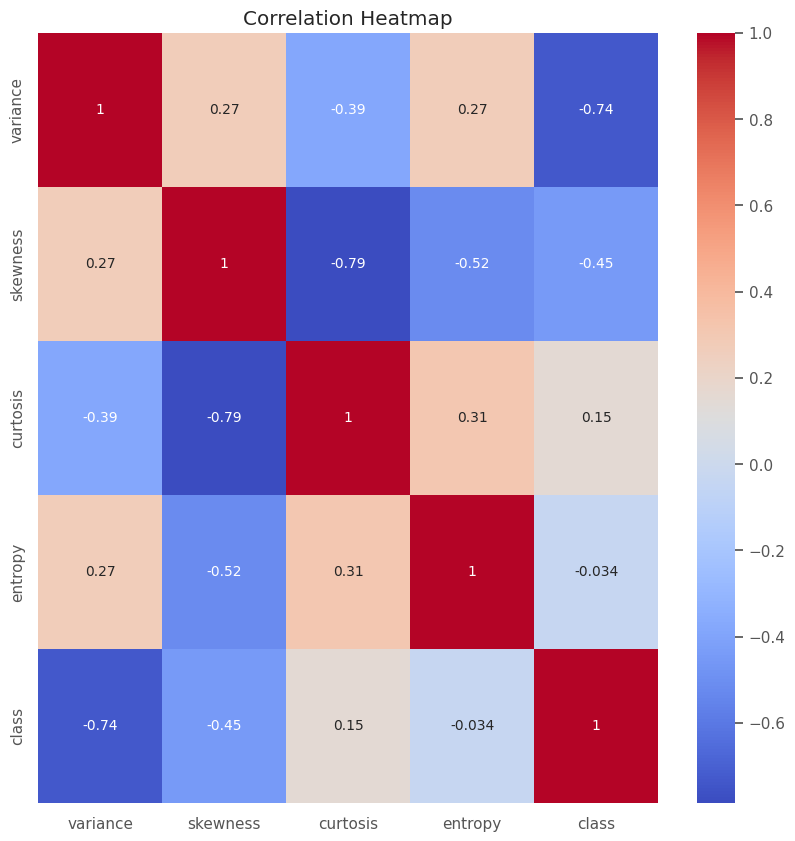

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True , cmap= 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

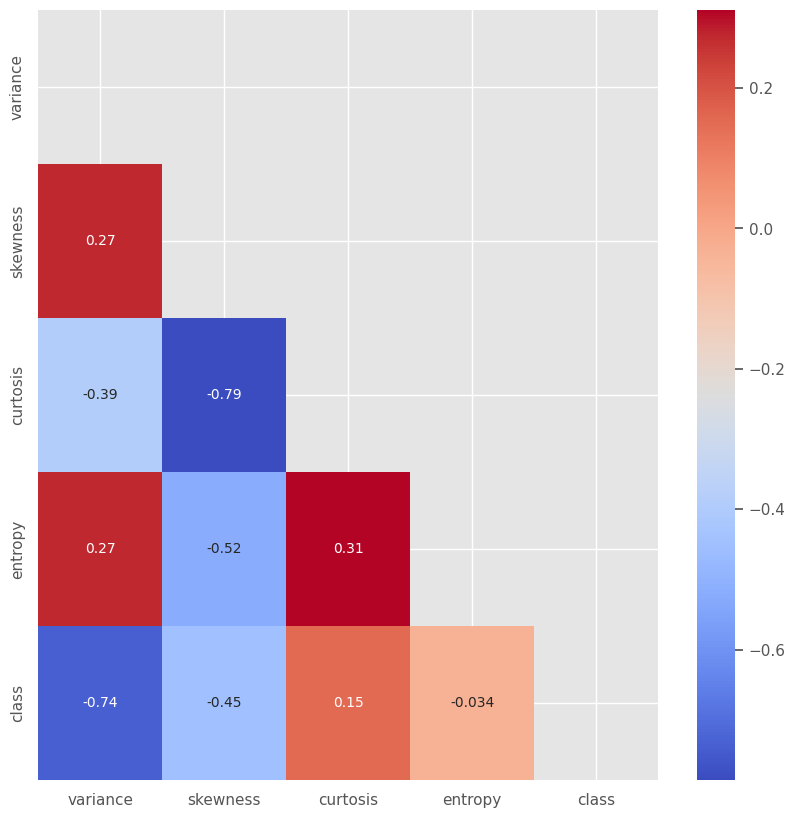

In [ ]:
# Generate a correlation matrix
corr = df.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='coolwarm')
plt.show()

## **5. Outlier Detection**

### Reasons For Having Outliers


1.   Variability in the data.
2.   An experimental error



### Impacts Of Having Outliers In A Dataset



1.   It causes various problems during out statistical analysis.
2.   It may cause a significant impact on the mean and standard deviation.



### Various Ways Of Finding The Outlier


1.   Using scatter plots
2.   Box plot
3.   Using z-score
4.   Using the IQR (interquartile range)



In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Finding Outliers using z-score calculation

In [ ]:
# finding the outliers using z-method
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# Print the indices of the rows containing outliers
print("Indices of rows with outliers:", outlier_indices)

Indices of rows with outliers: [1284, 1162, 1290, 1040, 1168, 918, 1046, 1179, 796, 284, 544, 802, 1194, 45, 563, 950, 191, 449, 1345, 198, 1223, 716, 1101, 1229, 979, 1107, 1240, 985, 857, 1118, 863, 741, 381, 511]


### df before dropping outliers

In [ ]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


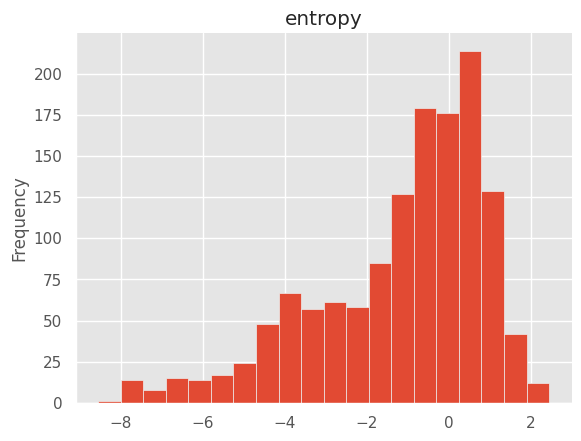

In [ ]:
# @title entropy

from matplotlib import pyplot as plt
df['entropy'].plot(kind='hist', bins=20, title='entropy')
plt.gca().spines[['top', 'right',]].set_visible(False)

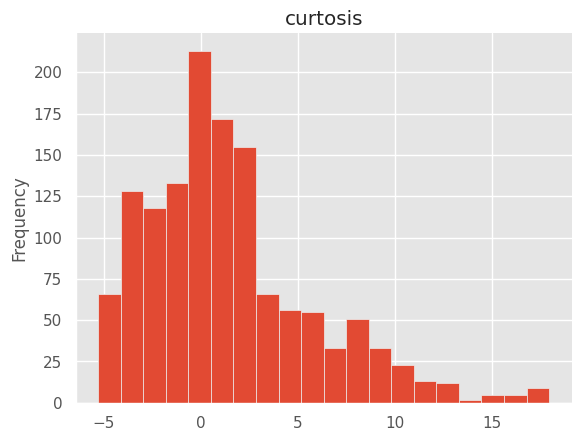

In [ ]:
# @title curtosis

from matplotlib import pyplot as plt
df['curtosis'].plot(kind='hist', bins=20, title='curtosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

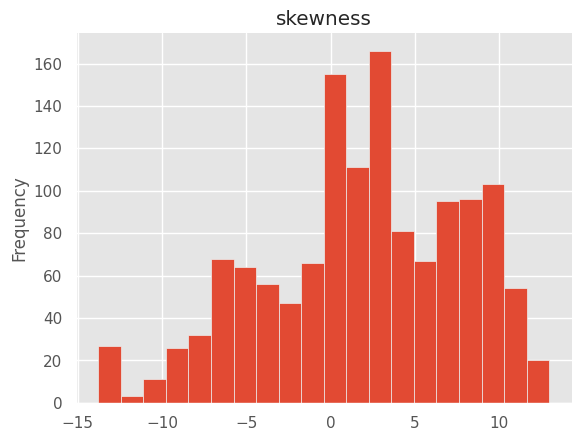

In [ ]:
# @title skewness

from matplotlib import pyplot as plt
df['skewness'].plot(kind='hist', bins=20, title='skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

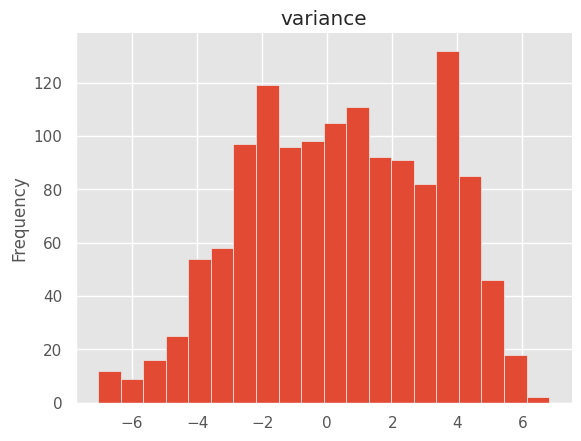

In [ ]:
# @title variance

from matplotlib import pyplot as plt
df['variance'].plot(kind='hist', bins=20, title='variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Dropping the outliers

In [ ]:
# Remove rows with outliers
df_no_outliers = df.drop(df.index[outlier_indices])

### df after dropping the outliers

In [ ]:
# Print the DataFrame without outliers
pd.DataFrame(df_no_outliers)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


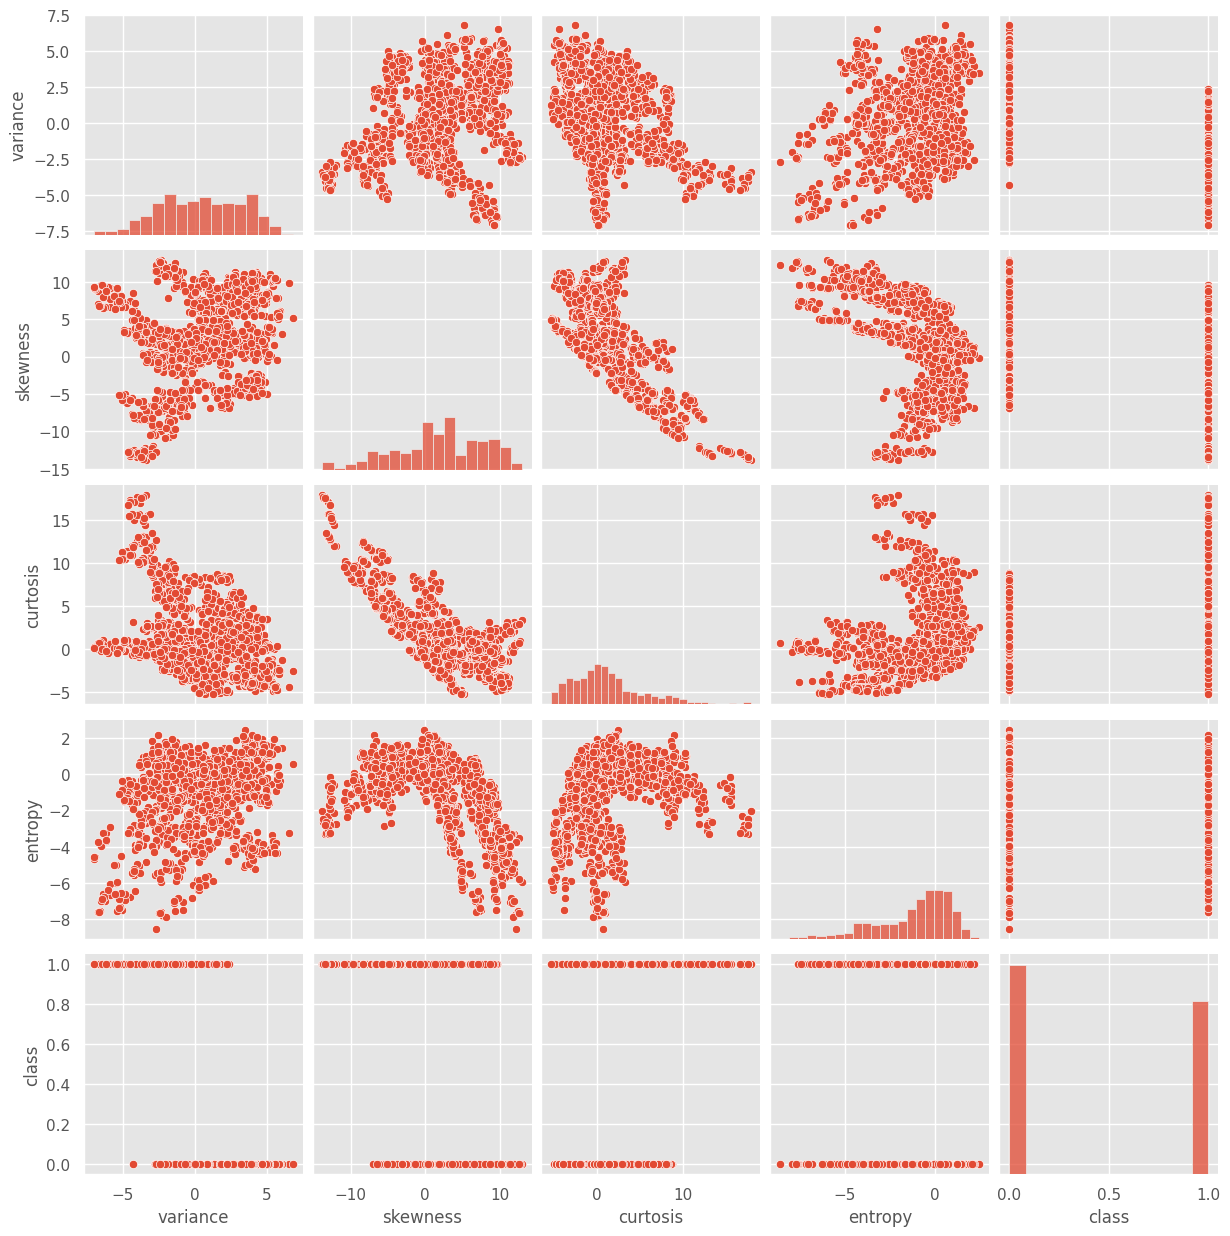

In [ ]:
# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns
# Create a scatter plot matrix to visualize potential outliers
sns.pairplot(df[numerical_cols])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


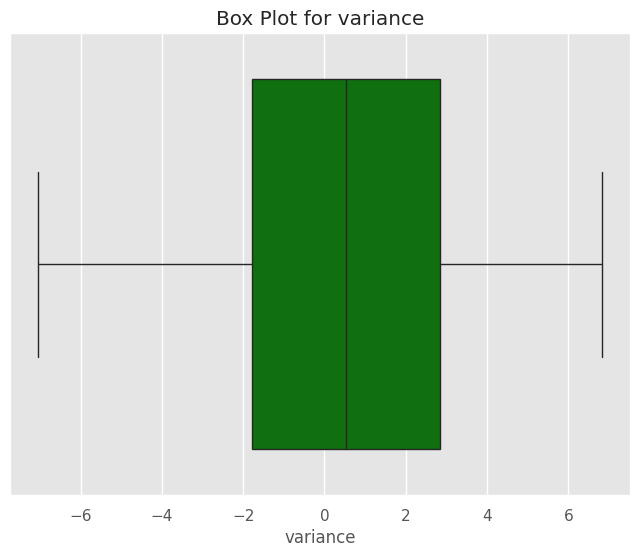

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


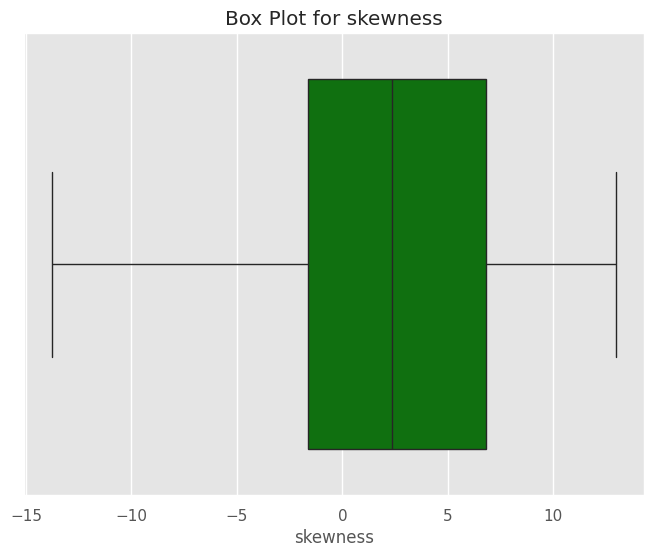

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


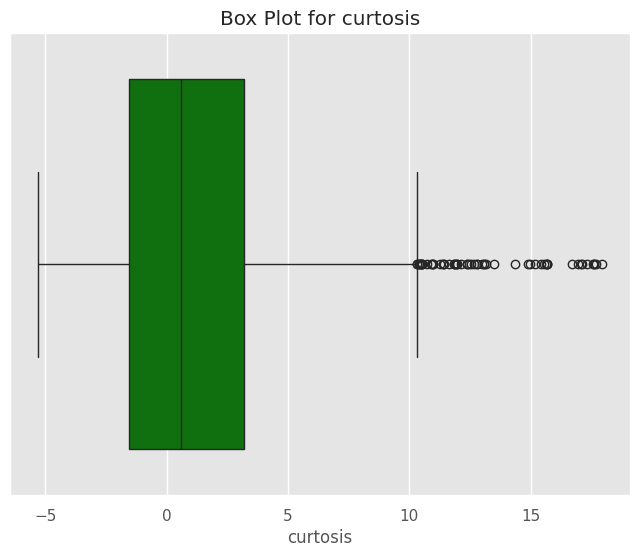

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


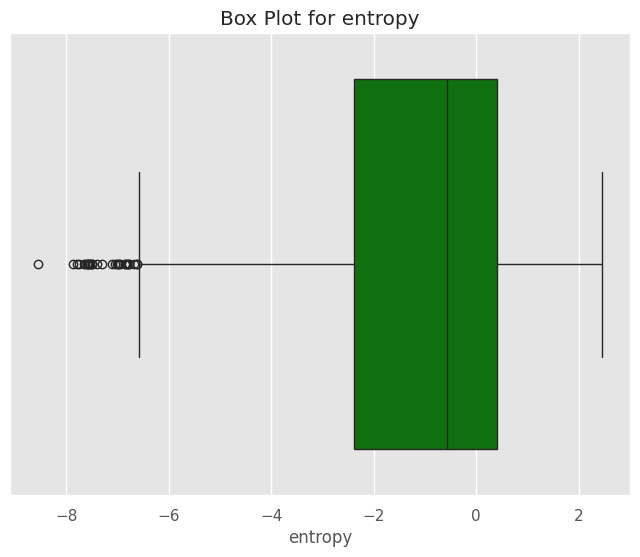

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


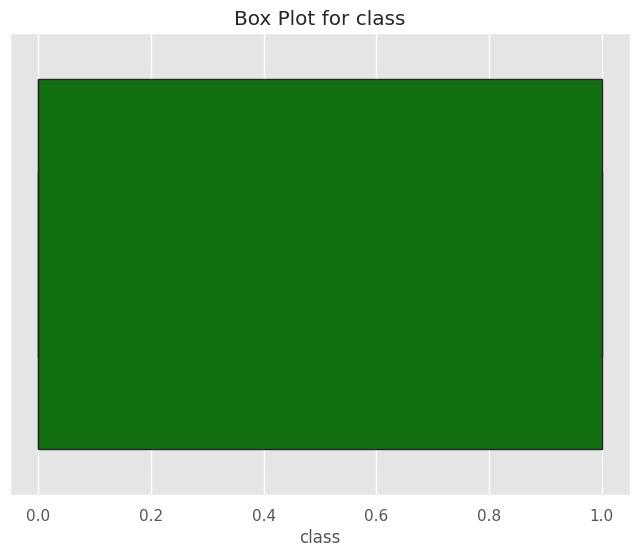

In [ ]:
# Create box plots for all numerical columns to visualize outliers
for col in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col], color='green')
  plt.xlabel(col)
  plt.title(f"Box Plot for {col}")
  plt.show()

## **6. Feature Scaling**

Feature Scaling is where you force all the values from a
column in your data to exist on the same scale. In certain
scenarios it will help the model assess the relationships
between variables more fairly, and more accurately.

The two most common scaling techniques are:

**Standardisation:** rescales all values to have a mean of 0
and standard deviation of 1. In other words, the majority
of your values end up between -4 and +4

**Normalisation:** rescales data so that it exists in a range
between 0 and 1

**Feature Scaling is essential** for distance-based models
such as k-means or k-nearest-neighbours.

**Feature Scaling is recommended** for any algorithms that
utilise Gradient Descent such as Linear Regression,
Logistic Regression, and Neural Networks.

**Feature Scaling is not necessary** for tree-based
algorithms such as Decision Trees & Random Forests.

### Before Scaling

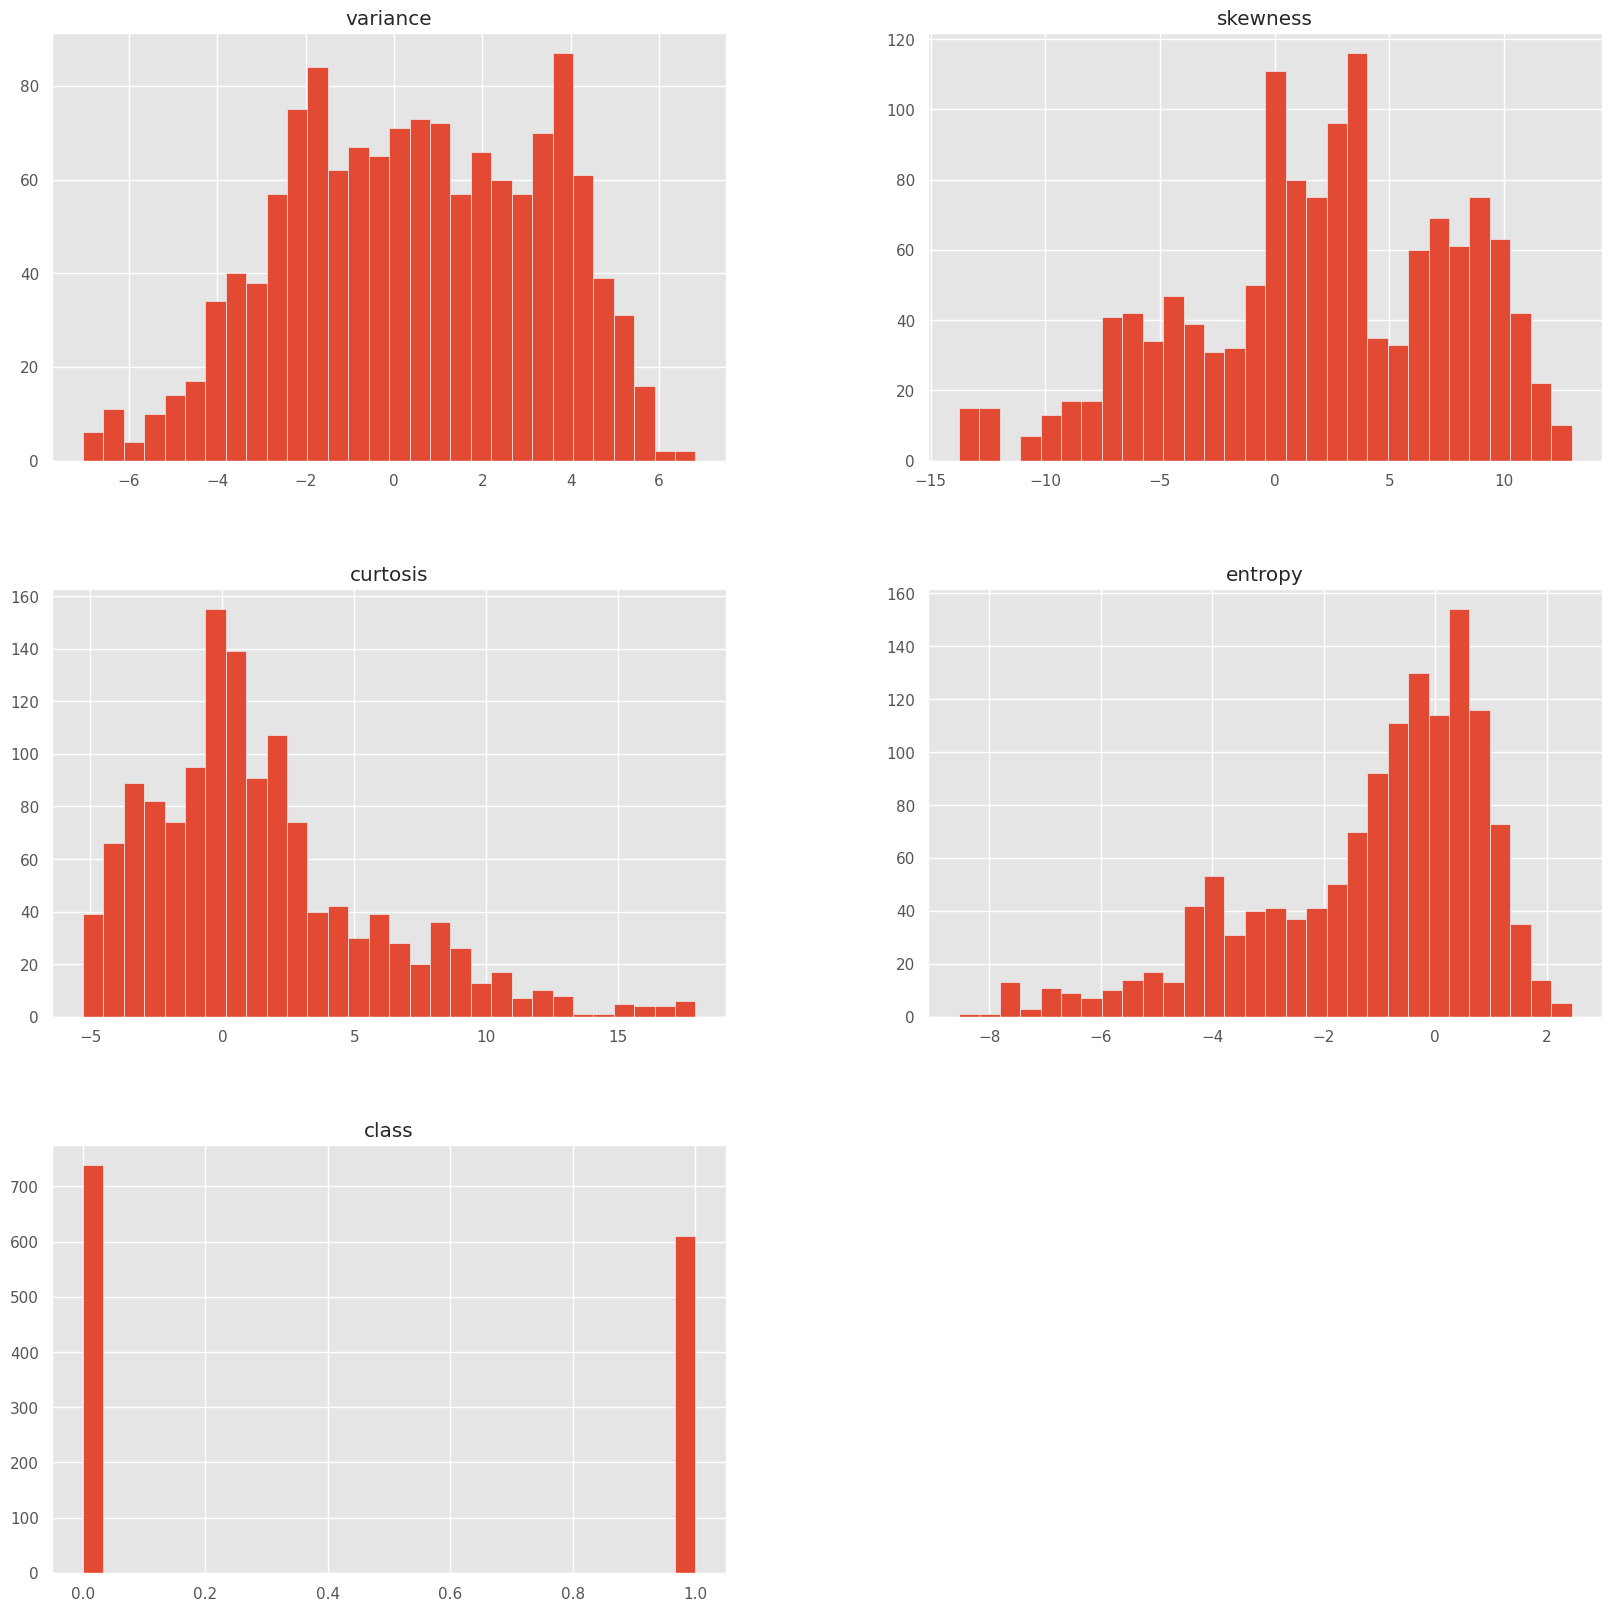

In [ ]:
# showing all the features of the dataset
df.hist(figsize=(20,20), bins =30)
plt.show()

In [ ]:
#df_no_outliers contains your data without outliers
# Create a copy of the dataframe to avoid modifying the original data
df_scaled = df_no_outliers.copy()

# Select the numerical features for normalization
numerical_features = df_scaled.select_dtypes(include=np.number).columns

# Apply normalization to the selected features
for feature in numerical_features:
  df_scaled[feature] = (df_scaled[feature] - df_scaled[feature].min()) / (df_scaled[feature].max() - df_scaled[feature].min())


# Display the first few rows of the scaled dataframe
df_scaled.head()

,variance,skewness,curtosis,entropy,class
0,0.769004,0.836671,0.126115,0.705886,0.0
1,0.835659,0.817665,0.143857,0.602811,0.0
2,0.786629,0.405839,0.366843,0.762083,0.0
3,0.757105,0.869322,0.064864,0.386294,0.0
4,0.531578,0.336593,0.501547,0.650870,0.0


### After Scaling

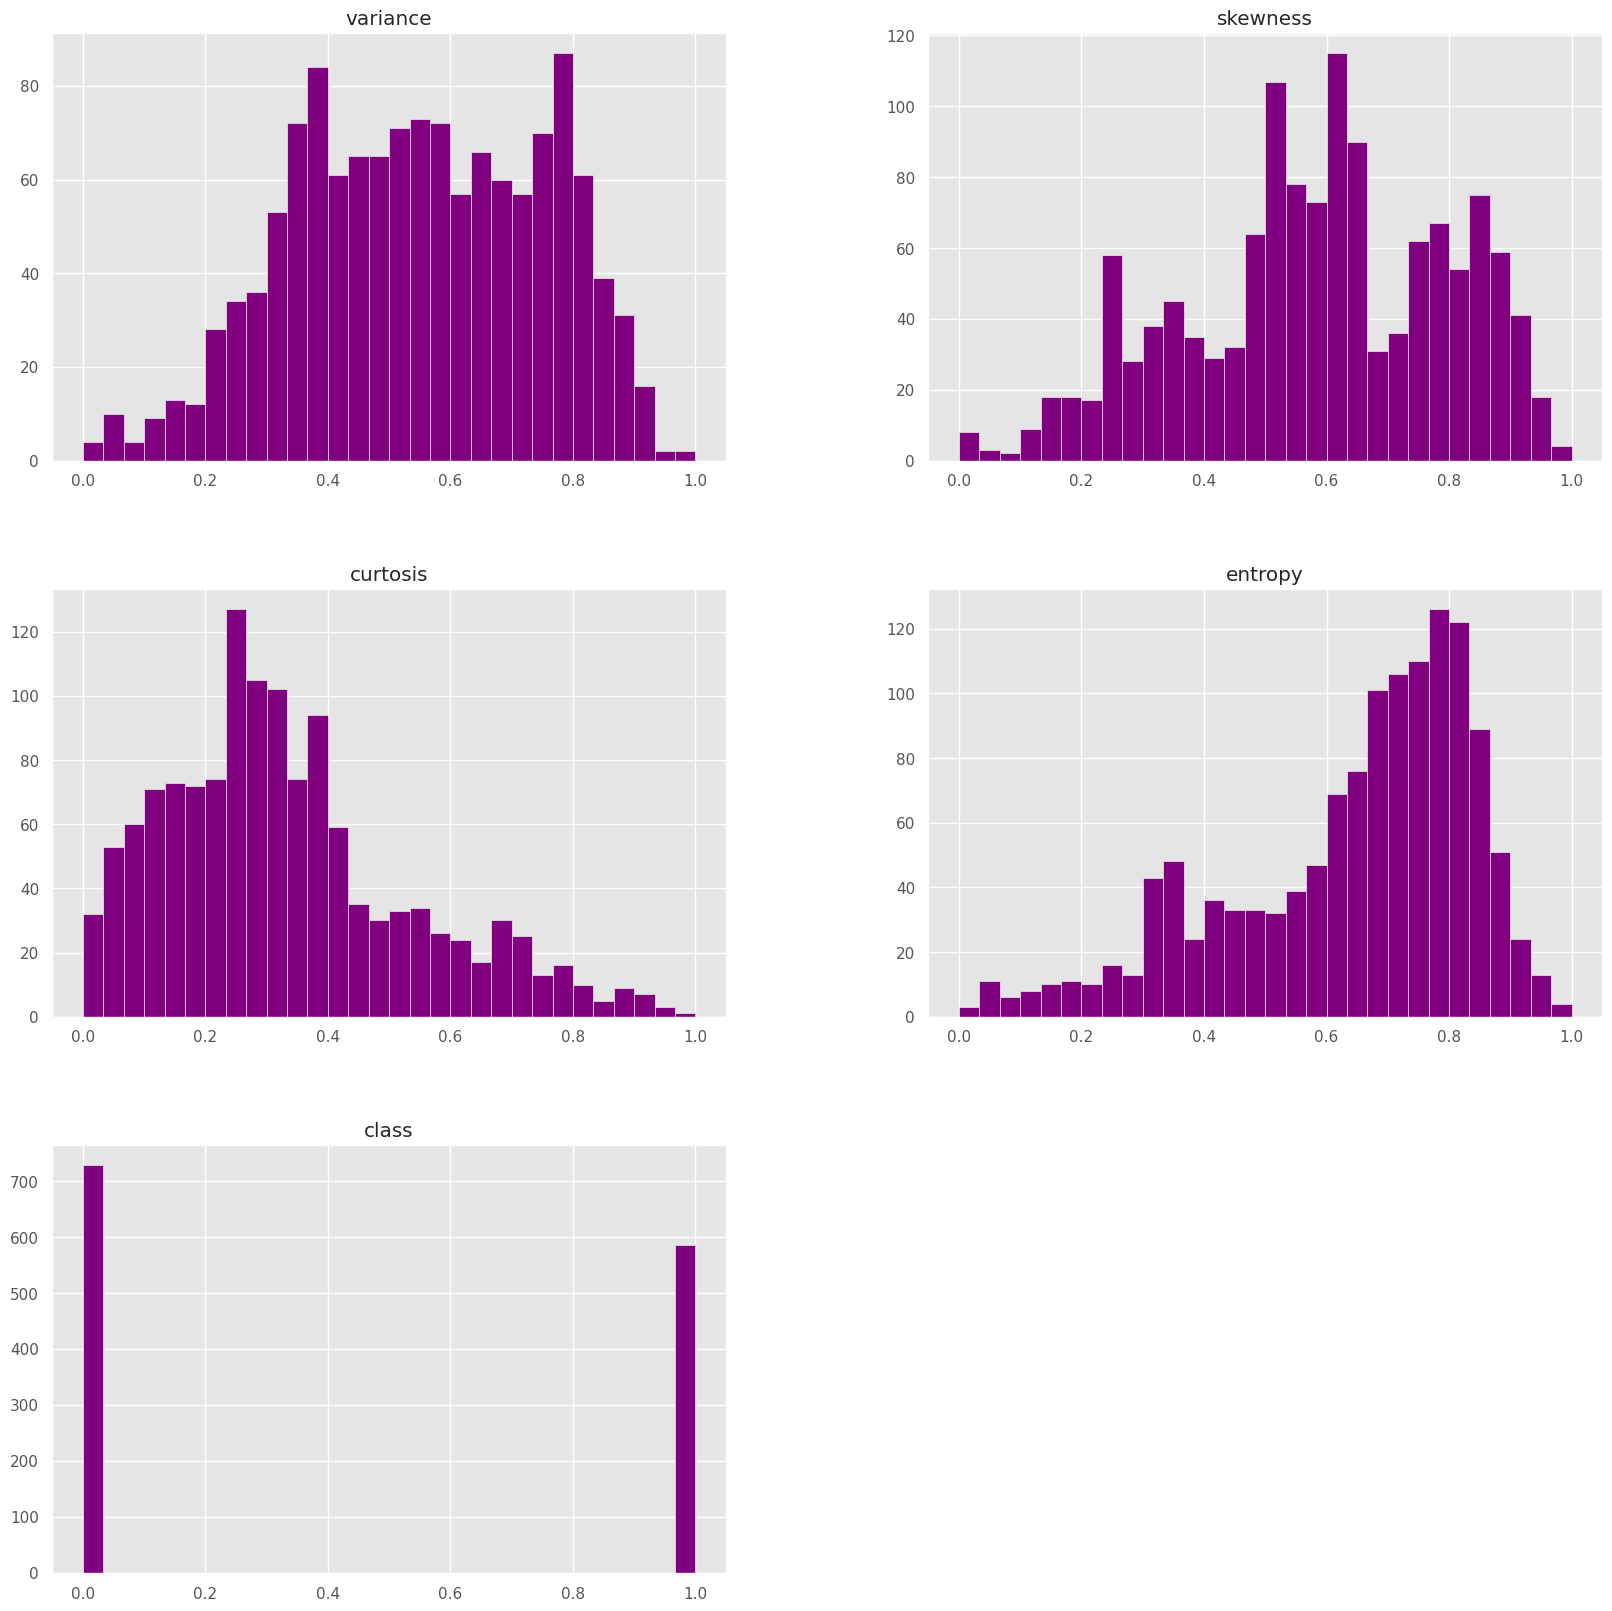

In [ ]:
# Display the histograms of the scaled data
df_scaled.hist(figsize=(20, 20), bins=30, color = 'purple')
plt.show()

## 7**. Feature Engineering And Feature Selection**
**Feature Engineering** is the process of using further
knowledge to supplement or transform the original
feature set.

The key to good Feature Engineering is to create or refine
features that the algorithm or model can understand
better or that it will find more useful than the raw features
for solving the particular problem at hand.

**Feature Selection** is where you only keep a subset of the
most informative variables. This can be done using
human intuition, or dynamically based upon statistical
analysis.

Columns with low variation:
['class']


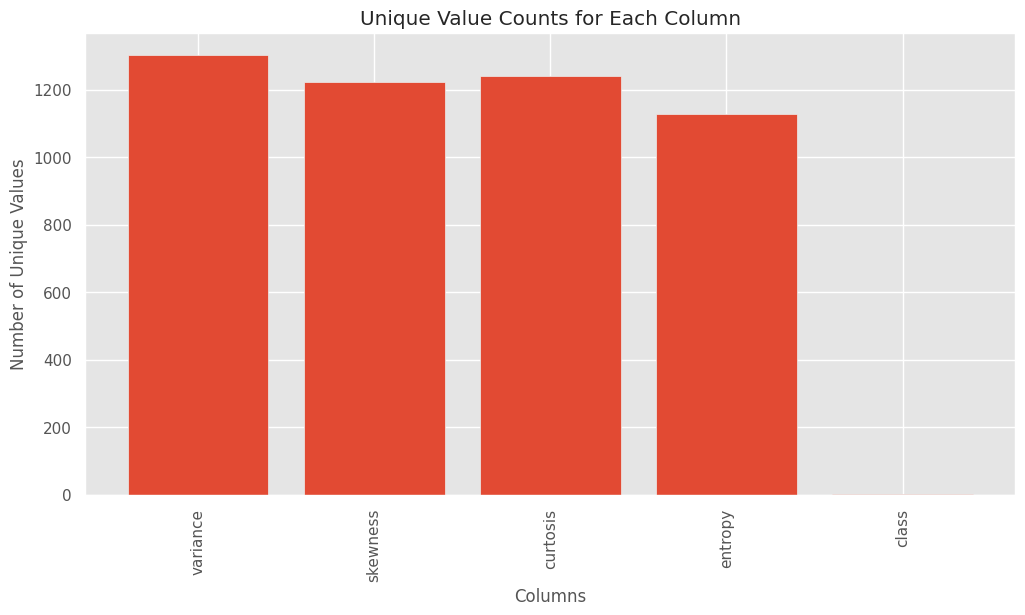

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_scaled.nunique()

# Identify columns with low variation (e.g., fewer than 5 unique values)
low_variation_columns = unique_counts[unique_counts < 5].index.tolist()

print("Columns with low variation:")
print(low_variation_columns)

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

**As all the features have high variation so there is no further need of feature engineering and no feature will be dropped. In other words, all features are declared as selected in this step for further processing.**

# Step 5: Model Training

### Separating the features and target variables

In [ ]:
# Separate features (X) and target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

In [ ]:
X

,variance,skewness,curtosis,entropy
0,0.769004,0.836671,0.126115,0.705886
1,0.835659,0.817665,0.143857,0.602811
2,0.786629,0.405839,0.366843,0.762083
3,0.757105,0.869322,0.064864,0.386294
4,0.531578,0.336593,0.501547,0.650870
...,...,...,...,...
1366,0.334040,0.649054,0.248484,0.619748
1367,0.537124,0.557810,0.195167,0.694463
1368,0.407690,0.320506,0.598499,0.785980
1370,0.250842,0.186909,0.899471,0.621068


In [ ]:
y

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1366,1.0
1367,1.0
1368,1.0
1370,1.0


### Splitting data into training and  testing data

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training a logistic regression model with L2 regularization

In [ ]:
# Train a logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Making predictions using the test data

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0.

# Step 6: Model Evaluation Using Confusion Metrics and ROC-AUC

### Drawing confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[145   3]
 [  4 111]]


### Making Classification report

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       148
         1.0       0.97      0.97      0.97       115

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263



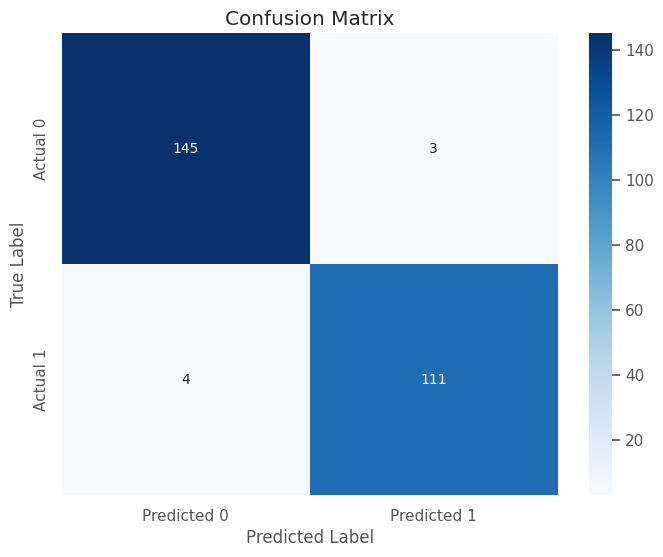

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Understanding the Metrics:

* **Precision:** Out of all the instances predicted as a specific class, what proportion was actually correct?

 * For class 0.0: 97% of the instances predicted as 0.0 were actually 0.0.

  * For class 1.0: 97% of the instances predicted as 1.0 were actually 1.0.

* **Recall:** Out of all the instances that are truly a specific class, what proportion did the model correctly identify?

  * For class 0.0: 98% of the actual 0.0 instances were correctly predicted as 0.0.

  * For class 1.0: 97% of the actual 1.0 instances were correctly predicted as 1.0.

* **F1-score:** The harmonic mean of precision and recall. It provides a balanced measure of the model's performance.

  * For class 0.0: 0.98

  * For class 1.0: 0.97

* **Support:** The number of actual instances in each class.

  * Class 0.0: 148 instances

  * Class 1.0: 115 instances

* **Accuracy:** The overall correctness of the model's predictions. In this case, the model is 97% accurate.

**Interpretation:**

The classification report shows that your model is performing very well, with high precision, recall, and F1-scores for both classes (0.0 and 1.0). This indicates that the model is accurately identifying both positive and negative instances.


### Calculating ROC-AUC

In [ ]:
# Calculate ROC-AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC:", roc_auc)


ROC-AUC: 0.9990599294947121


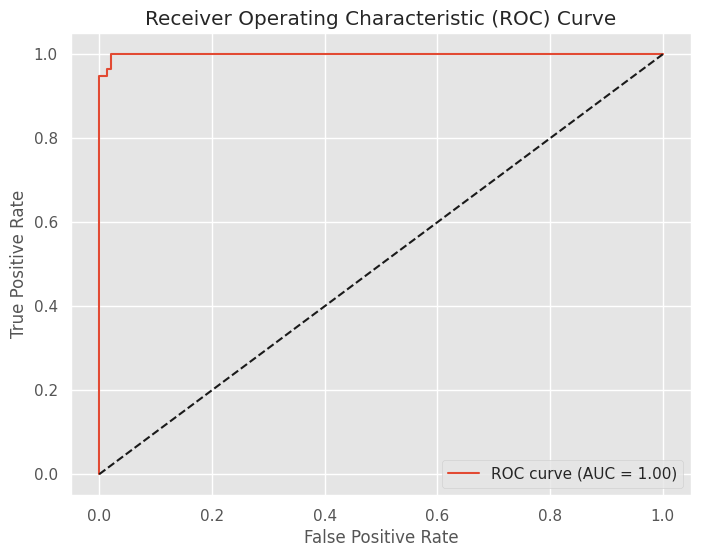

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**An AUC of 0.999 suggests that your model is nearly perfect at separating the two classes. It has a very high probability of correctly ranking a positive instance higher than a negative instance. This is an excellent result, indicating a highly accurate and reliable classification model.**

# Step 7: Exploring the impact of L2-regularization on the model performance

In [ ]:
# using smaller values of c
for c in [0.01, 0.1, 1, 10, 100]:
  model = LogisticRegression(penalty='l2', C=c, solver='liblinear', random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  roc_auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
  print(f"C = {c}, ROC-AUC: {roc_auc}")

C = 0.01, ROC-AUC: 0.9391304347826086
C = 0.1, ROC-AUC: 0.9783783783783784
C = 1, ROC-AUC: 0.9990599294947121
C = 10, ROC-AUC: 1.0
C = 100, ROC-AUC: 1.0


**The analysis of ROC-AUC scores for different 'C' values provides valuable insights into the impact of regularization on your model's performance. It helps you find the optimal balance between model complexity and generalization ability, ultimately leading to a more accurate and reliable classification model.**

# Step 8: Bonus: Can you improve the model's performance by tuning its hyperparameters? Try using GridSearchCV to find the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Penalty type
    'solver': ['liblinear'],         # Solver for logistic regression
    'max_iter': [1000, 5000, 10000]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

# You can use the best model from GridSearchCV for predictions and further evaluation.
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
roc_auc_best = metrics.roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print("ROC-AUC with best model:", roc_auc_best)



Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC: 0.9999633162142333
ROC-AUC with best model: 1.0


# Conclusion

Overall, the developed classification model demonstrates exceptional performance, achieving a perfect ROC-AUC score on the evaluation data. Its robust discrimination capabilities and potential for generalization make it a valuable asset for real-world applications.